Load diva library package

In [1]:
include("../../../diva_library/src/jdiva_lib.jl")
using .jdiva
using Printf

Base.show(io::IO, f::Float64) = @printf(io, "%.2f", f)
Base.show(io::IO, f::Float32) = @printf(io, "%.2f", f)
cd(@__DIR__)

We load the hypsometric profiles for each segment (we have precomputed and saved them before)

In [2]:
hspfs = load_hsps_nc(Int32, Float32, "../../../diva_library/testdata/UKIRL/nc/UKIRL_hspfs_floodplains.nc")
#println(sum(map(x -> exposure(hspfs[x],10.0)[3][1], collect(keys(hspfs)))))

Dict{Int32, HypsometricProfile{Float32}} with 2764 entries:
  2288 => HypsometricProfile{Float32}(2.06, "km", Float32[-5.00, -4.90, -4.80, …
  1703 => HypsometricProfile{Float32}(3.93, "km", Float32[-5.00, -4.90, -4.80, …
  1956 => HypsometricProfile{Float32}(0.39, "km", Float32[-5.00, -4.90, -4.80, …
  2350 => HypsometricProfile{Float32}(2.12, "km", Float32[-5.00, -4.90, -4.80, …
  687  => HypsometricProfile{Float32}(3.12, "km", Float32[-5.00, -4.90, -4.80, …
  2015 => HypsometricProfile{Float32}(0.46, "km", Float32[-5.00, -4.90, -4.80, …
  185  => HypsometricProfile{Float32}(0.33, "km", Float32[-5.00, -4.90, -4.80, …
  1090 => HypsometricProfile{Float32}(2.13, "km", Float32[-5.00, -4.90, -4.80, …
  1704 => HypsometricProfile{Float32}(4.16, "km", Float32[-5.00, -4.90, -4.80, …
  422  => HypsometricProfile{Float32}(1.07, "km", Float32[-5.00, -4.90, -4.80, …
  1266 => HypsometricProfile{Float32}(0.89, "km", Float32[-5.00, -4.90, -4.80, …
  183  => HypsometricProfile{Float32}(1.89, "km",

We choose the hypsometric profile of a specific floodplain 

We can visually inspect which floodplain we want to choose by opening ../../../diva_library/testdata/UKIRL/gpkg/UKIRL_merit_coastplain_lecz_H100+2m_GADM1_partitioned.gpkg


In [3]:
south_london = hspfs[2513]

HypsometricProfile{Float32}(10.19, "km", Float32[-5.00, -4.90, -4.80, -4.70, -4.60, -4.50, -4.40, -4.30, -4.20, -4.10  …  19.10, 19.20, 19.30, 19.40, 19.50, 19.60, 19.70, 19.80, 19.90, 20.00], "m", Float32[0.00, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04  …  15.74, 15.75, 15.75, 15.76, 15.76, 15.79, 15.80, 15.80, 15.82, 15.83], "km^2", Matrix{Float32}(undef, 251, 0), (), String[], Float32[0.00 0.00; 175.73 9375076.00; … ; 88462.33 4719482880.00; 88531.72 4723184640.00], (:population, :assets), ["", ""], ExtendedLogger(Base.CoreLogging.NullLogger(), "", Base.DevNull(), Dates.DateTime("2024-02-08T19:18:55.248")))

We plot the south london hypsometric profile

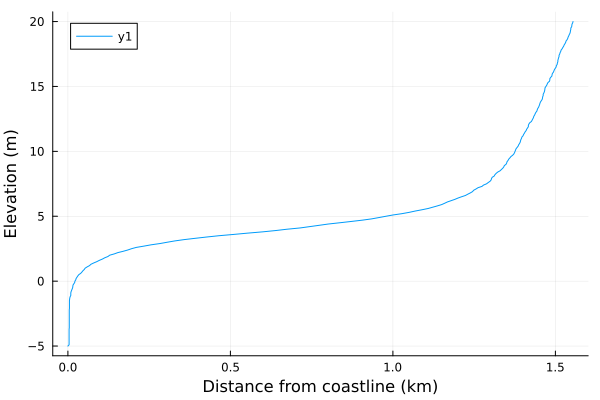

In [19]:
using Plots
plot(south_london)

Show exposure for a plausibility check

In [4]:
println("Exposure below 5m: $(exposure(south_london,5.0))")
println("Exposure (assets) below 5m: $(exposure(south_london,5.0)[3][2])")

Exposure below 5m: (9.97, Float32[], Float32[46286.30, 2469384192.00])
Exposure (assets) below 5m: 2.4693842e9


In [5]:
#function pimp(tuple)
#  (round(tuple[1], sigdigits=2),tuple[2],tuple[3])
#  (round(tuple[1], sigdigits=2),tuple[2],map(x -> round(x,sigdigits=2)))
#end

Do a little exposure/damage calculation for different water-levels. What do we notice?

In [6]:
println("damage:")
for wl in 0.00f0:0.25f0:5.00f0
  expo = exposure(south_london, wl)
  dam  = damage_standard_ddf(south_london, wl, 0f0, [], [0f0,1f0])
  println("waterlevel $wl m\t:  exposure = $expo; \t damage = $dam")
end


damage:
waterlevel 0.0 m	:  exposure = (0.22, Float32[], Float32[327.07, 17449196.00]); 	 damage = (0.22, Float32[], Float32[327.07, 11618293.00])
waterlevel 0.25 m	:  exposure = (0.27, Float32[], Float32[362.02, 19313898.00]); 	 damage = (0.26, Float32[], Float32[358.22, 12493928.00])
waterlevel 0.5 m	:  exposure = (0.34, Float32[], Float32[385.46, 20564158.00]); 	 damage = (0.34, Float32[], Float32[385.46, 13417571.00])
waterlevel 0.75 m	:  exposure = (0.45, Float32[], Float32[435.36, 23226786.00]); 	 damage = (0.44, Float32[], Float32[426.61, 14522331.00])
waterlevel 1.0 m	:  exposure = (0.54, Float32[], Float32[485.73, 25913962.00]); 	 damage = (0.54, Float32[], Float32[485.73, 15935175.00])
waterlevel 1.25 m	:  exposure = (0.70, Float32[], Float32[559.45, 29846848.00]); 	 damage = (0.68, Float32[], Float32[546.65, 17509718.00])
waterlevel 1.5 m	:  exposure = (0.90, Float32[], Float32[681.82, 36375120.00]); 	 damage = (0.90, Float32[], Float32[681.82, 19663114.00])
waterlevel 1.75 

Compare different damage calculations

In [7]:
println("Fast calculation (8m flood): damage_standard_ddf(south_london, 3.0, 0f0, [], [0f0,1f0]) = ")
@time dam = damage_standard_ddf(south_london, 8.0, 0f0, [], [0f0,1f0])
@time dam = damage_standard_ddf(south_london, 8.0, 0f0, [], [0f0,1f0])
println(dam)


Fast calculation (8m flood): damage_standard_ddf(south_london, 3.0, 0f0, [], [0f0,1f0]) = 
  0.000933 seconds (2.05 k allocations: 71.781 KiB)
  0.000645 seconds (2.05 k allocations: 71.781 KiB)
(3.12, Float32[], Float32[7629.50, 119260968.00])


We now define the depth-damage functions (ddf's) explicitly with parameter $h$

$ddf(h)=: f(d)= \frac{d}{d+h}$

In [2]:
ddf0(d :: Float32) = 1f0

ddf(h :: Float32) = function(d :: Float32);
  return (d / (d+h))
end

ddf (generic function with 1 method)

These calls should lead to the same results as the ones above - but with slightly slower computation times

In [21]:
println("Slower calculation (8m flood): damage(south_london, 8.0, ddf0, [], [ddf0,ddf(1.0f0)]) = ")
@time dam = damage(south_london, 3.0, ddf0, [], [ddf0,ddf(1.0f0)])
@time dam = damage(south_london, 3.0, ddf0, [], [ddf0,ddf(1.0f0)])
println(dam)

Slower calculation (8m flood): damage(south_london, 8.0, ddf0, [], [ddf0,ddf(1.0f0)]) = 
  0.001473 seconds (8.67 k allocations: 235.094 KiB)
  0.003356 seconds (8.67 k allocations: 235.094 KiB)
(13.30, Float32[], [65060.25, 2618515489.67])


These calls should lead to the same results as the calls above - but with much slower computation times

In [22]:
println("Much slower calculation (3m flood): damage(south_london, 8.0, d->1, [], [d->1,d->d/(d+1)]) = ")
@time dam = damage(south_london, 3.0, d->1, [], [d->1,d->d/(d+1)])
@time dam = damage(south_london, 3.0, d->1, [], [d->1,d->d/(d+1)])
println(dam)

Much slower calculation (8m flood): damage(south_london, 8.0, d->1, [], [d->1,d->d/(d+1)]) = 
  5.502553 seconds (1.68 M allocations: 85.547 MiB, 4.51% gc time, 99.95% compilation time)
  5.326946 seconds (1.68 M allocations: 85.566 MiB, 3.43% gc time, 99.93% compilation time)
(13.30, Float32[], [65060.25, 2618515489.67])


This is more experimental: if we make explicit that the parameter is a Float32 (1.0f0 instead if 1) does this change computation times? (spoiler: only a tiny bit)


In [11]:
println("Much slower but slightly fast than the previos calculation (3m flood): damage(south_london, 8.0, d->1f0, [], [d->1f0,d->d/(d+1.0f0)]) = ")
@time dam = damage(south_london, 3.0, d->1f0, [], [d->1f0,d->d/(d+1.0f0)])
@time dam = damage(south_london, 3.0, d->1f0, [], [d->1f0,d->d/(d+1.0f0)])
println(dam)

Much slower but slightly fast than the previos calculation (8m flood): damage(south_london, 8.0, d->1f0, [], [d->1f0,d->d/(d+1.0f0)]) = 
  5.305018 seconds (1.63 M allocations: 82.772 MiB, 1.67% gc time, 99.95% compilation time)
  4.263364 seconds (1.63 M allocations: 82.753 MiB, 2.40% gc time, 99.94% compilation time)
(13.30, Float32[], [65060.25, 2618515489.67])


Now we test to compute damages for all floodplains (8.0m flood everywhere)

we define a helper function that does the accumulation

$f(hspfs,wl,..)= \sum_{hspfs} $ damage_standard_ddf $ (hspf,wl,..)$

In [12]:
function damage_all_fp(hspfs, wl, hdd_area, hdds_static, hdds_dynamic) 
    r = 0.0f0
    for (fpid, hspf) in hspfs
      r += damage_standard_ddf(hspf, wl, hdd_area, hdds_static, hdds_dynamic)[3][2]
    end
    return r
  end  

damage_all_fp (generic function with 1 method)

All the computation below should come up with the same result (except from liitle numerical differences)

In [13]:
println("8m flood everywhere, fast computation")
@time dam=sum(map(x -> damage_standard_ddf(hspfs[x], 8.0, 0f0, [], [0f0,1f0])[3][2], collect(keys(hspfs))))
@time dam=sum(map(x -> damage_standard_ddf(hspfs[x], 8.0, 0f0, [], [0f0,1f0])[3][2], collect(keys(hspfs))))
println(dam)

8m flood everywhere, fast computation
  5.020694 seconds (8.17 M allocations: 279.007 MiB, 10.41% gc time, 29.00% compilation time)
  3.275021 seconds (7.55 M allocations: 243.548 MiB, 8.61% gc time, 7.86% compilation time)
1.1295264e11


In [14]:
println("8m flood everywhere, faster computation")
@time dam=damage_all_fp(hspfs, 8.0, 0f0, [], [0f0,1f0])
@time dam=damage_all_fp(hspfs, 8.0, 0f0, [], [0f0,1f0])
println(dam)

8m flood everywhere, faster computation
  3.038567 seconds (7.45 M allocations: 237.869 MiB, 12.37% gc time, 4.41% compilation time)
  2.411668 seconds (7.44 M allocations: 237.099 MiB, 7.10% gc time)
1.1295264e11


In [15]:
println("8m flood everywhere, slower computation")
@time dam=sum(map(x -> damage(hspfs[x], 8.0, ddf0, [], [ddf0,ddf(1.0f0)])[3][2], collect(keys(hspfs))))
@time dam=sum(map(x -> damage(hspfs[x], 8.0, ddf0, [], [ddf0,ddf(1.0f0)])[3][2], collect(keys(hspfs))))
println(dam)

8m flood everywhere, slower computation
 11.074389 seconds (15.50 M allocations: 475.086 MiB, 6.31% gc time, 28.70% compilation time)
  5.464519 seconds (13.65 M allocations: 371.409 MiB, 5.81% gc time, 3.85% compilation time)
112952635024.64


In [16]:
println("8m flood everywhere, much slower computation")
@time dam=sum(map(x -> damage(hspfs[x], 8.0, d->1f0, [], [d->1,d->d/(d+1.0f0)])[3][2], collect(keys(hspfs))))
@time dam=sum(map(x -> damage(hspfs[x], 8.0, d->1f0, [], [d->1,d->d/(d+1.0f0)])[3][2], collect(keys(hspfs))))
println(dam)

8m flood everywhere, much slower computation
  9.604638 seconds (15.51 M allocations: 468.230 MiB, 6.20% gc time, 49.96% compilation time)
  9.908110 seconds (15.51 M allocations: 468.205 MiB, 5.35% gc time, 44.69% compilation time)
112952635024.64
